# Good ELN Example

### Name: John Doe


### Date: October 27, 2021


### PID: XXXX-XXXXX


### Jupyter Notebook Number: 1

## Purpose/Objective:
1. Find a way to print a natural image to the screen.
2. Organize the natural scenes into loud and quiet scenes.

## Protocol:
1. Follow the Open for (neuro)science video and create a natural scene template that can be used to print any of the 118 scenes.
2. Write a for-loop to facilitate sorting of all the natural scene indices.

## Expected Results:
1. One of the natural scenes printed to the sceen.
2. Two lists separating the natural scene indices.

### Installing AllenSDK into your local environment. 

In [1]:
pip install --user allensdk

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Starting Code:

In [2]:
import os
import shutil
import allensdk
import pprint

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.core.brain_observatory_cache import BrainObservatoryCache

In [4]:
data_directory = 'allen_files' 

manifest_path = os.path.join(data_directory, "manifest.json")
boc = BrainObservatoryCache(manifest_file = manifest_path)

### Printing out natural scenes
In order to get the template with all 118 natural scenes, I need to access one specific experiment that contains natural scenes. I do this by selecting the first experiment container ID and the first session ID in that container that contains natural scenes. I obtain all the data from that experiment and use it to create my template.

In [5]:
exps = boc.get_experiment_containers()
pd.DataFrame(exps).head(1)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,660492886,275,VISal,Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),306500,Sst-IRES-Cre;Ai148(CAM)-306500,[],False


In [6]:
experiment_container_id = 660492886 #ID obtained from above
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                       stimuli=['natural_scenes'])[0]['id']
data_set = boc.get_ophys_experiment_data(session_id) #Use the session ID to download the corresponding NWB file
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

2021-11-22 10:00:16,560 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/591296388


The scene number can be any integer between 1 and 118. Changing this variable will change which scene is displayed.

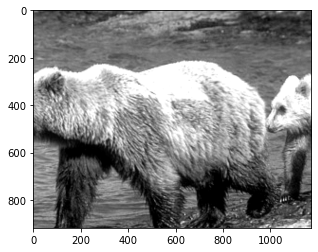

In [7]:
scene_number = 0
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

### Organizing natural scenes
To streamline the classification of each scene, I used a for-loop. As I looked at each scene, I eneter a 1 for loud scenes and a 2 for quiet scenes. For each scene I did this for, the scene number was added to its corresponding list. I printed out both of these list in order to make my constants in the following cell.

In [28]:
loud = []
quiet = []

for i in range(1,119):
    val = int(input("Image: " + str(i) + " - Enter '1' for a loud scene and '2' for a quiet scene: "))
    if(val == 1):
        loud.append(i)
    else:
        quiet.append(i)

print(loud)
print(quiet)

Image: 1 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 2 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 3 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 4 - Enter '1' for a loud scene and '2' for a quiet scene: 2
Image: 5 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 6 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 7 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 8 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 9 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 10 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 11 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 12 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 13 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 14 - Enter '1' for a loud scene and '2' for a quiet scene: 1
Image: 15 - Enter '1' for a loud scene and '2' for a quie

In [29]:
loud_scenes = [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 28, 30, 33, 35, 37, 39, 
               40, 45, 46, 47, 48, 51, 54, 57, 58, 80]
quiet_scenes = [4, 19, 20, 21, 22, 25, 26, 27, 29, 31, 32, 34, 36, 38, 41, 42, 43, 44, 49, 50, 52, 53, 55, 
                56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 
                82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 
                104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118]

## Resources
1. Open for (neuro)sceincetutorial on the Allen Brain Observatory: https://www.youtube.com/watch?v=UtbeF-Id5Ic
2. GitHub Repository with corresponding jupyter notebboks: https://github.com/AllenInstitute/brain_observatory_examples/tree/master/Open%20for%20NeuroScience%202020